<a href="https://colab.research.google.com/github/ByeonJuHwan/PythonStudy/blob/main/py22_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imorts

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tips 데이터 셋

In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Box plot

연속형 변수의 기술 통계량 (최솟값, 최댓값, 사분위)

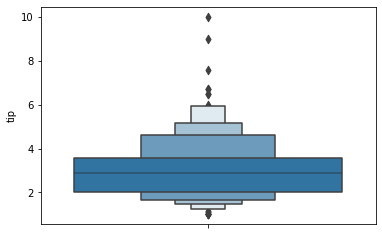

In [7]:
sns.boxenplot(data=tips,y='tip')
plt.show()

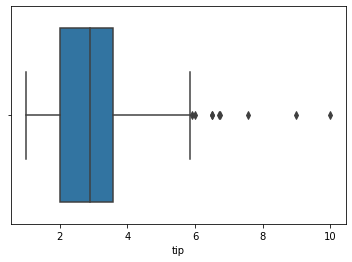

In [8]:
sns.boxplot(data=tips, x='tip')
plt.show()

성별 tip의 box plot

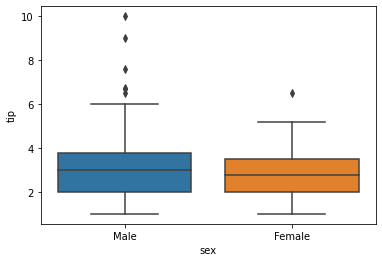

In [11]:
sns.boxplot(data=tips,y='tip',x='sex')
plt.show()

In [12]:
tips[tips.sex=='Male'].tip.describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

요일별 tip의 box plot

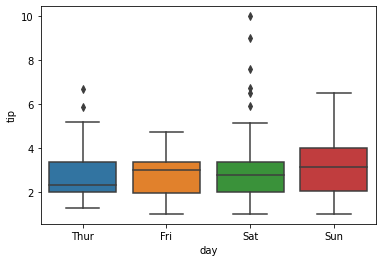

In [13]:
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

* subplot을 2개 생성 (1x2)
* 흡연 여부별 tip의 boxplot, 시간별 tip의 box plot

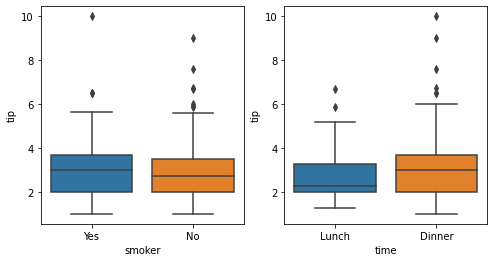

In [23]:
fig, ax = fig, ax = plt.subplots(ncols=2, figsize=(8,4))

sns.boxplot(data=tips, x='smoker',y='tip',ax=ax[0])
sns.boxplot(data=tips, x='time',y='tip',ax=ax[1])
plt.show()

# Histogram

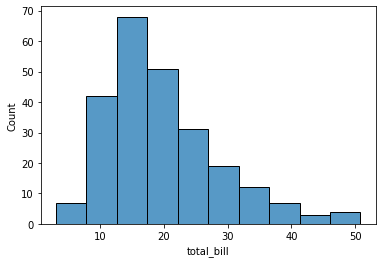

In [27]:
sns.histplot(data=tips, x='total_bill',bins=10)
plt.show()

# Bar plot

## `countplot()`

카테고리 타입 변수의 빈도수를 막대로 표현.


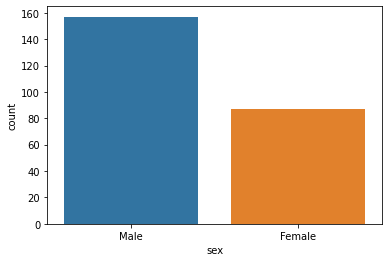

In [28]:
sns.countplot(data=tips,x='sex') # 성별 빈도수 세로 막대 그래프
plt.show()

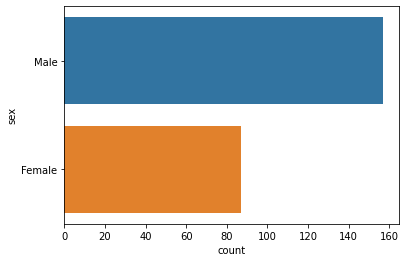

In [30]:
sns.countplot(data=tips, y='sex') # 성별 빈도수 가로 막대 그래프
plt.show()

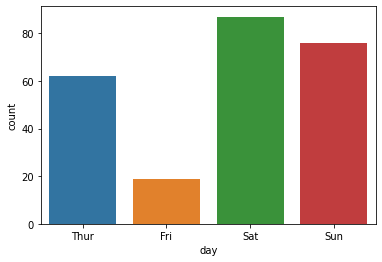

In [33]:
sns.countplot(data=tips, x='day')
plt.show()

In [34]:
# 요일별 성별 빈도수
tips.groupby(['day','sex']).tip.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

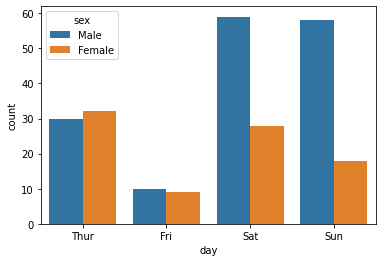

In [36]:
sns.countplot(data=tips, x='day',hue='sex')
# param hue : 카테고리 변수 이름. 카테고리별 다르게 색깔을 사용하는 경우.
plt.show()

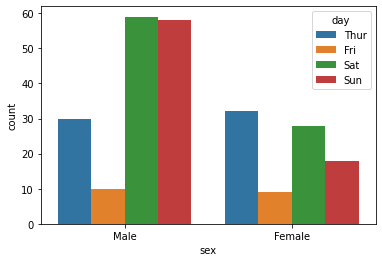

In [43]:
sns.countplot(data=tips, x='sex', hue='day')
plt.show()

성별, 흡연 여부별 빈도수

In [48]:
tips.groupby(['sex','smoker']).tip.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

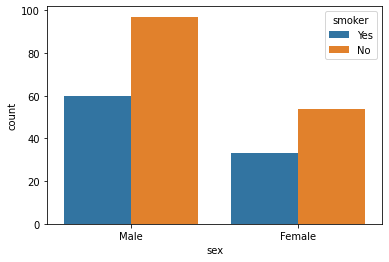

In [45]:
sns.countplot(data=tips, x='sex',hue='smoker')
plt.show()

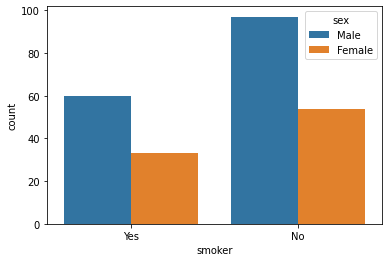

In [47]:
sns.countplot(data = tips, x='smoker', hue='sex')
plt.show()

## `barplot()`

* 그룹별 변수의 통계량(평균, 표준편차, 중앙값, 개수, ...) 막대로 시각화.
* 통계량 함수의 기본값은 평균(np.mean).
* 카테고리 타입 변수와 연속형 변수를 함께 시각화.

In [49]:
# 성별 팁의 평균
tips.groupby('sex').tip.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

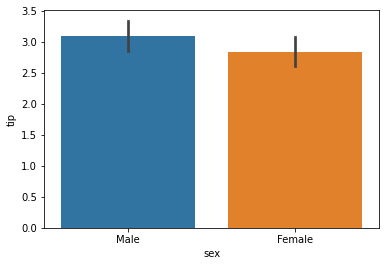

In [51]:
sns.barplot(data=tips, x='sex', y='tip')
plt.show()

In [53]:
# 성별 tip의 최댓값
tips.groupby('sex').tip.max()

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

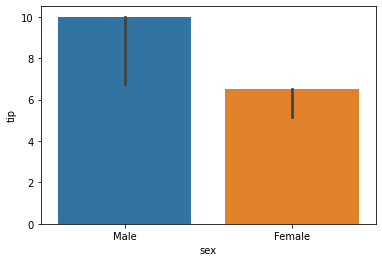

In [55]:
sns.barplot(data=tips, x='sex',y='tip',estimator=np.max)
plt.show()

In [61]:
# 성별, 흡연 여부별 팁의 평균
tips.groupby(['sex','smoker']).tip.mean()

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

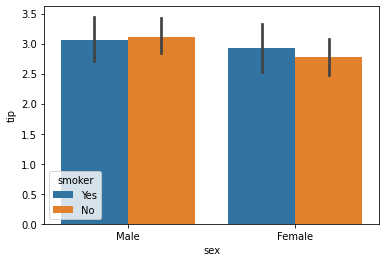

In [62]:
# 성별, 흡연 여부별 팁의 평균
sns.barplot(data=tips,x='sex',y='tip',hue='smoker',estimator=np.mean) 
plt.show()

# Scatter plot

* `tip ~ total_bill` 산점도

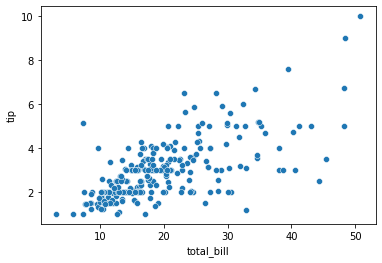

In [64]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.show()

* `tip ~ total_bill` 산점도
* 점의 색깔을 성별에 따라서 다르게 표현

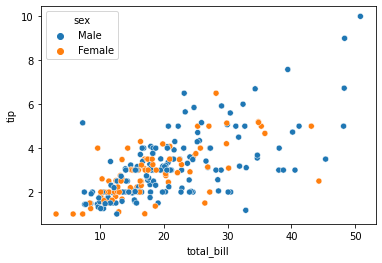

In [65]:
sns.scatterplot(data=tips, x="total_bill", y="tip",hue='sex')
plt.show()

* tip ~ total_bill 산점도
* 점의 색깔은 성별에 따라서 다르게 표현
* 점의 모양은 흡연여부에 따라서 다르게 표현 그룹별로 모양을 바꿔주는 파라미터
* 점의 크기를 인원수에 따라서 다르게 표현

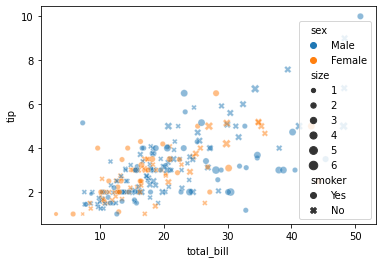

In [70]:
sns.scatterplot(data=tips, x="total_bill", y="tip",hue='sex',style='smoker',size='size',alpha=0.5)
plt.show()

# Category plot

카테고리별로 subplot들을 생성하고 통계값(평균, 중앙값, ...) 계산해서, 각각의 subplot에 같은 종류의 그래프들을 시각화.

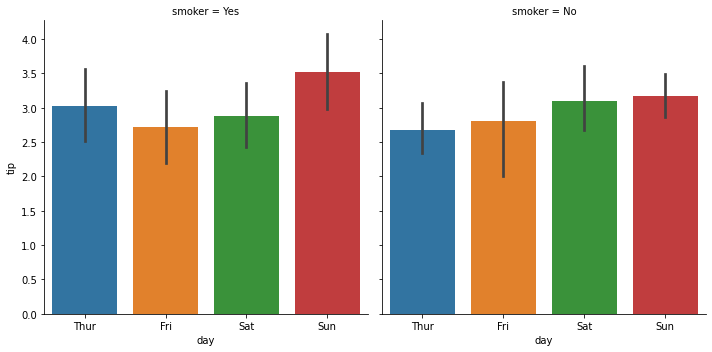

In [73]:
# 요일별 팁의 평균 막대 그래프를 흡연여부 별로 subplot을 생성.
sns.catplot(data=tips,x='day',y='tip', col='smoker', kind='bar')
plt.show()

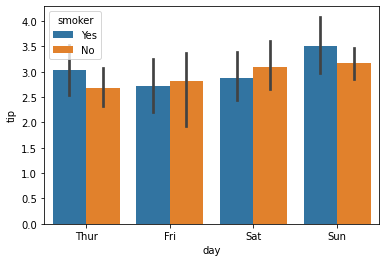

In [74]:
sns.barplot(data=tips, x='day',y='tip',hue='smoker')
plt.show()

요일별 tp의 평균 막대그래프 + 시간별 subplot 생성

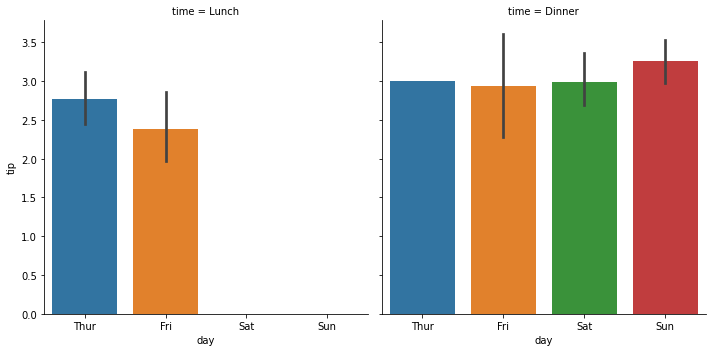

In [77]:
sns.catplot(data=tips,x='day',y='tip', col='time', kind='bar')
plt.show()

요일별 tip의 평균 막대 그래프 + 흡연여부별 subplot + 시간별 subplot 생성

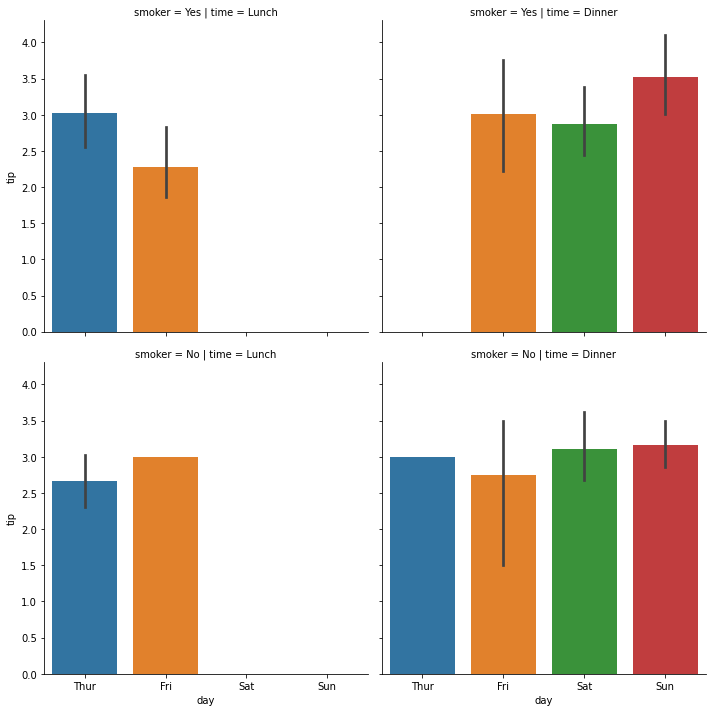

In [81]:
sns.catplot(data=tips,x='day',y='tip', col='time',row='smoker', kind='bar')
plt.show()

요일별 성별 tip의 평균 막대 그래프 + 시간별 subplot

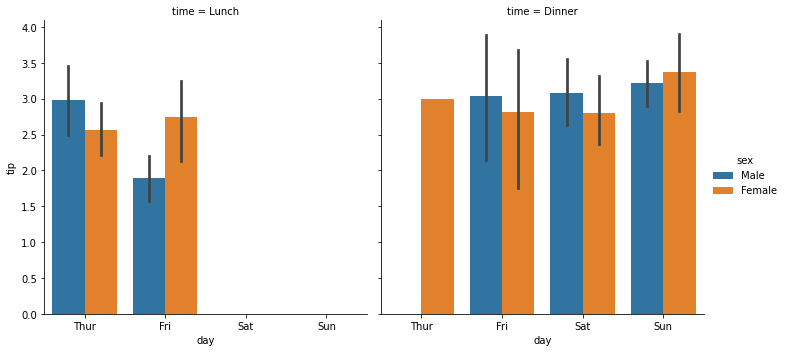

In [83]:
sns.catplot(data=tips,x='day',y='tip', hue='sex',col='time', kind='bar')
plt.show()

성별 tip의 box plot + 요일별 subplot

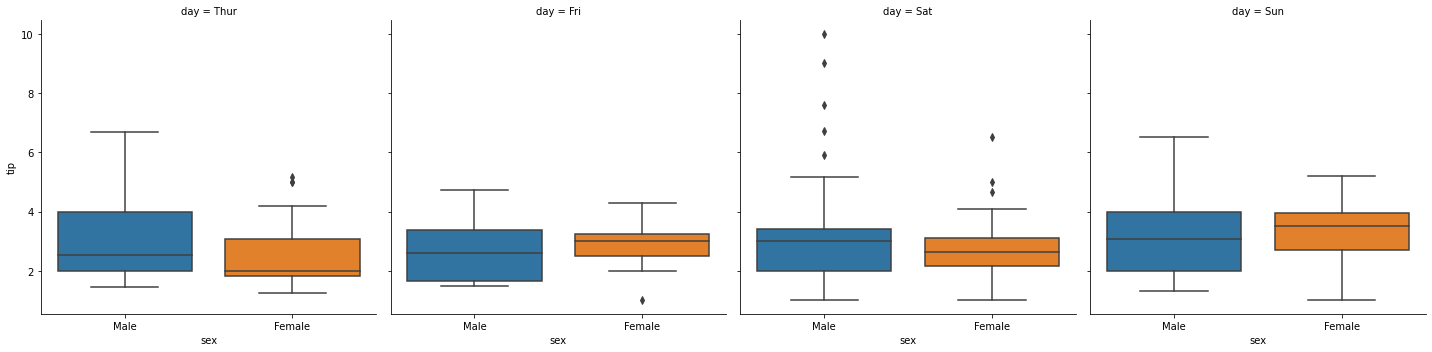

In [80]:
sns.catplot(data=tips,x='sex',y='tip', col='day', kind='box')
plt.show()